# <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Drug_Classification</div>

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> About Dataset</h3>
</div>


* Age: Numeric input field.
* Sex: Radio buttons for 'F' and 'M'.
* Blood Pressure (BP): Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Cholesterol: Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Na_to_K: Numeric input field for the Sodium-to-Potassium ratio.

In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [287]:
data=pd.read_csv('drug200.csv')

In [288]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [289]:
data.shape

(200, 6)

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [291]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [292]:
data.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [293]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [294]:
for i in data.columns:
    print(i,':',data[i].nunique())

Age : 57
Sex : 2
BP : 3
Cholesterol : 2
Na_to_K : 198
Drug : 5


In [295]:
data.duplicated().sum()

0

<Axes: xlabel='Sex', ylabel='count'>

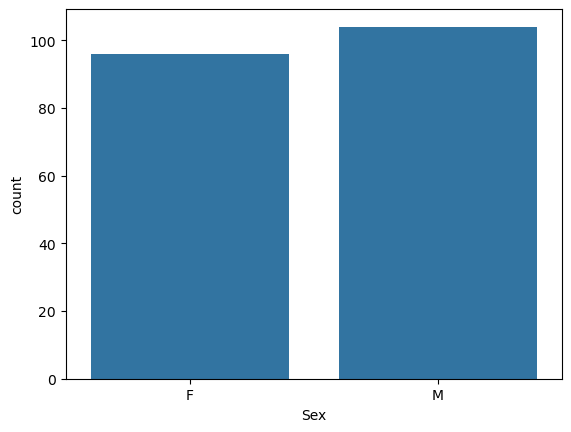

In [296]:
sns.countplot(data=data,x='Sex')

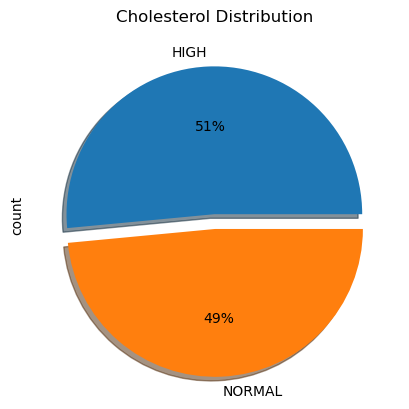

In [297]:
plt.title('Cholesterol Distribution')
data['Cholesterol'].value_counts().plot(kind='pie',explode=(0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

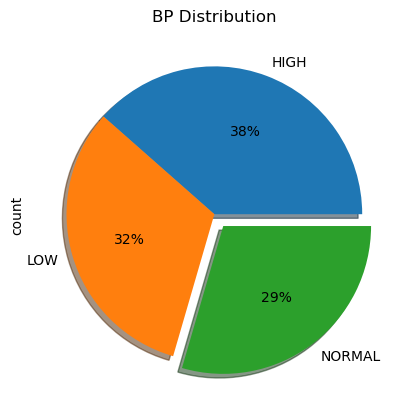

In [298]:
plt.title('BP Distribution')
data['BP'].value_counts().plot(kind='pie',explode=(0,0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

[]

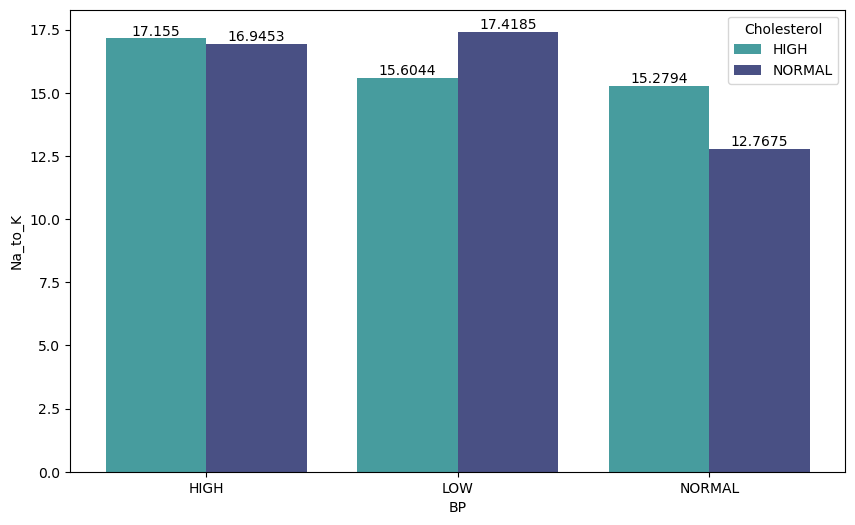

In [299]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='BP',y='Na_to_K',data=data,hue='Cholesterol',palette="mako_r", ci = False)

for i in fig.containers:
    fig.bar_label(i, label_type="edge", color = 'black')
    
plt.plot()

In [300]:
pd.crosstab(data.Sex,data.Drug)

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [301]:
pd.crosstab(data.Drug,data.BP)

BP,HIGH,LOW,NORMAL
Drug,,,
DrugY,38,30,23
drugA,23,0,0
drugB,16,0,0
drugC,0,16,0
drugX,0,18,36


In [302]:
pd.crosstab(data.Drug,data.Cholesterol)

Cholesterol,HIGH,NORMAL
Drug,,
DrugY,47,44
drugA,12,11
drugB,8,8
drugC,16,0
drugX,20,34


[]

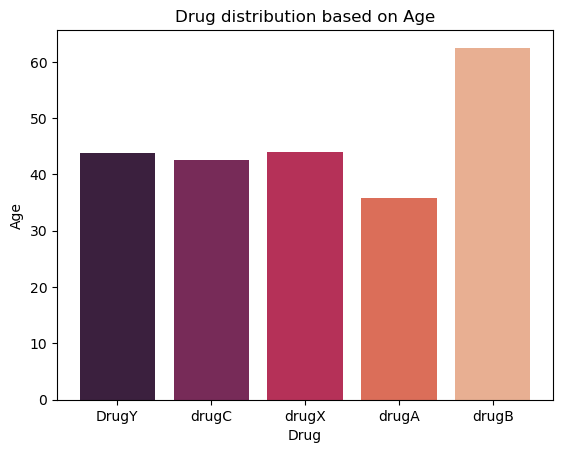

In [303]:
sns.barplot(x=data.Drug,y=data.Age,palette="rocket", ci = False)
plt.title('Drug distribution based on Age')
plt.plot()

[]

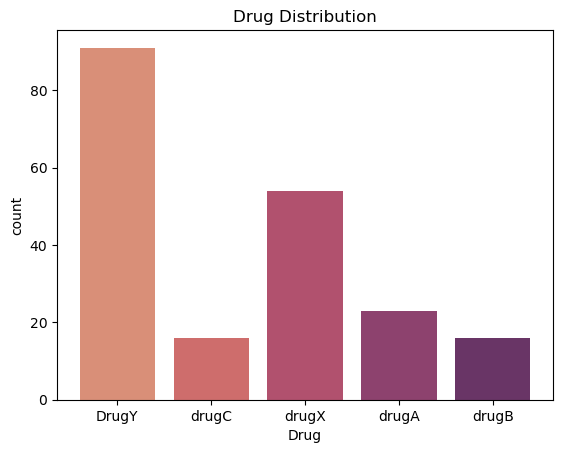

In [304]:
plt.title('Drug Distribution')
sns.countplot(data=data,x='Drug',palette="flare")
plt.plot()

* From this diagram we can say distributions of target variable "drug" is imbalenced

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Model Building</h3>
</div>

In [307]:
data=pd.get_dummies(data, columns = ['Sex'],drop_first=True)

In [308]:
data=pd.get_dummies(data, columns = ['Cholesterol'],drop_first=True)

In [309]:
data['BP'] = data['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

In [310]:
data.head()

,Age,BP,Na_to_K,Drug,Sex_M,Cholesterol_NORMAL
0,23,2,25.355,DrugY,False,False
1,47,0,13.093,drugC,True,False
2,47,0,10.114,drugC,True,False
3,28,1,7.798,drugX,False,False
4,61,0,18.043,DrugY,False,False


In [311]:
x=data.drop('Drug', axis = 1)
x.head()

,Age,BP,Na_to_K,Sex_M,Cholesterol_NORMAL
0,23,2,25.355,False,False
1,47,0,13.093,True,False
2,47,0,10.114,True,False
3,28,1,7.798,False,False
4,61,0,18.043,False,False


In [312]:
y=data['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [313]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [314]:
x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)

In [315]:
y_train.to_frame().value_counts()

Drug 
DrugY    61
drugX    36
drugA    18
drugB    13
drugC    12
Name: count, dtype: int64

In [316]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [317]:
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [318]:
y_train_s.to_frame().value_counts()

Drug 
DrugY    61
drugA    61
drugB    61
drugC    61
drugX    61
Name: count, dtype: int64

In [319]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_s)

In [320]:
x_train = pd.DataFrame(x_train, columns = x.columns)

In [321]:
x_train.head()

,Age,BP,Na_to_K,Sex_M,Cholesterol_NORMAL
0,0.251961,-1.268048,3.644597,0.672593,1.023220
1,0.643046,-1.268048,4.629561,-1.486784,-0.977307
2,0.708226,-0.156684,0.123146,-1.486784,-0.977307
3,-1.051654,0.954680,2.359429,-1.486784,1.023220
4,1.555576,-1.268048,0.263353,-1.486784,1.023220


In [322]:
x_test=scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns = x.columns)

In [323]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train_s)

LogisticRegression()

In [324]:
y_pred=LR.predict(x_train)

In [325]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
accuracy=accuracy_score(y_train_s,y_pred)
accuracy

0.9639344262295082

In [326]:
report = classification_report(y_train_s, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.95      0.90      0.92        61
       drugA       0.95      1.00      0.98        61
       drugB       0.97      1.00      0.98        61
       drugC       0.95      1.00      0.98        61
       drugX       1.00      0.92      0.96        61

    accuracy                           0.96       305
   macro avg       0.96      0.96      0.96       305
weighted avg       0.96      0.96      0.96       305



In [327]:
y_pred_=LR.predict(x_test)

In [328]:
accuracy_lr=accuracy_score(y_test,y_pred_)
accuracy_lr

0.9666666666666667

In [329]:
report = classification_report(y_test, y_pred_)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        30
       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       0.80      1.00      0.89         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.91      0.99      0.94        60
weighted avg       0.97      0.97      0.97        60



# Save model file using pickle 

In [331]:
import pickle

In [332]:
pickle.dump(LR, open('final_model.pkl','wb'))

In [333]:
pickle.dump(scaler, open('final_scaler.pkl','wb'))

In [334]:
model = pickle.load(open('final_model.pkl','rb'))

In [335]:
Scaler = pickle.load(open('final_scaler.pkl','rb'))

### Test the model using sample data

In [337]:
ts = np.array([[23,2,25.355,False,False]])

In [338]:
sc = Scaler.transform(ts)

In [339]:
model.predict(sc)

array(['DrugY'], dtype=object)

In [340]:
# ['Age', 'BP', 'Na_to_K', 'Sex_M', 'Cholesterol_NORMAL']
tt = np.array([[23,2,25.355,0,0]])

In [341]:
sc1 = Scaler.transform(tt)

In [342]:
model.predict(sc1)

array(['DrugY'], dtype=object)

### Test the model using data in the original format

In [344]:
# Input the data in the original format
input_data = [[23, 'F', 'HIGH', 'HIGH', 25.355]]

In [345]:
# Preprocess the input
def preprocess_input(input_data):
    # Convert to DataFrame for easier processing
    input_df = pd.DataFrame(input_data, columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

    # Create dummy variables for `Sex` and `Cholesterol`
    input_df = pd.get_dummies(input_df, columns=['Sex', 'Cholesterol'], drop_first=True)

    # Map BP column as used in training
    input_df['BP'] = input_df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

    # Fill missing dummy columns (if any) to match training features
    for col in ['Sex_M', 'Cholesterol_NORMAL']:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with default value 0

    # Reorder columns to match the training data
    input_df = input_df[['Age', 'BP', 'Na_to_K', 'Sex_M', 'Cholesterol_NORMAL']]

    return input_df

In [346]:
# Preprocess the input
processed_input = preprocess_input(input_data)

In [347]:
sc2 = Scaler.transform(processed_input)

In [348]:
model.predict(sc2)

array(['DrugY'], dtype=object)

In [349]:
x_train.columns

Index(['Age', 'BP', 'Na_to_K', 'Sex_M', 'Cholesterol_NORMAL'], dtype='object')

# KNeighbors classifer

In [351]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train_s)

KNeighborsClassifier(n_neighbors=10)

In [418]:
y_pred_kn=kn.predict(x_test)
y_pred_kn

array(['drugC', 'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugC',
       'drugX', 'drugC', 'drugX', 'drugA', 'DrugY', 'DrugY', 'drugX',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY',
       'drugX', 'drugB', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugB', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'drugB', 'drugC', 'drugC', 'drugB', 'drugC', 'drugA', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugC', 'DrugY', 'drugB'], dtype=object)

In [420]:
accuracy=accuracy_score(y_test,y_pred_kn)
accuracy

0.6666666666666666

In [423]:
report = classification_report(y_test, y_pred_kn)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.63      0.78        30
       drugA       0.50      0.60      0.55         5
       drugB       0.33      1.00      0.50         3
       drugC       0.36      1.00      0.53         4
       drugX       0.73      0.61      0.67        18

    accuracy                           0.67        60
   macro avg       0.59      0.77      0.60        60
weighted avg       0.80      0.67      0.69        60



In [425]:
from sklearn.model_selection import GridSearchCV

In [453]:
kn = KNeighborsClassifier()


params = {
    'weights': ['uniform','distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [5,10,15],
    
}


model_cv = GridSearchCV(estimator=kn, param_grid=params)


model_cv.fit(x_train, y_train_s)  

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [455]:
print("Best Parameters:", model_cv.best_params_)
print("Best Accuracy:", model_cv.best_score_)

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy: 0.9081967213114754
